<a href="https://colab.research.google.com/github/helenksouza/helenksouza/blob/main/PySci_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy e Numba

In [54]:
import numpy as np
from numba import njit, jit

In [3]:
#Numeric Python: operações numéricas
#Escrito em C #Muito eficiência

Primeira regra basica de um codigo eficiente: NÃO UTILIZAR `for`!

In [4]:
x = 2
x = 'FAT'

Numba -> JIT (Just-in-Time)

In [5]:
#Vai descobrir tipo de variável

## Alguns testes

## Python Puro

In [22]:
%%timeit

s = 0
for i in range(10000000):
  s += i**2 + i

1 loop, best of 5: 3.39 s per loop


In [7]:
l = list(range(10000000))

In [8]:
%%timeit

s = 0
for i in l:
  s += i**2 + i

1 loop, best of 5: 3.27 s per loop


## Numpy

In [26]:
%%timeit

arr = np.array(range(10000000))
s_np = np.sum(np.power(arr,2)+ arr)

1 loop, best of 5: 1.94 s per loop


In [24]:
arr = np.array(range(10000000))

In [11]:
type(arr)

numpy.ndarray

In [12]:
arr.dtype

dtype('int64')

In [13]:
arr.shape

(10000000,)

In [27]:
%%timeit 

s_np = np.sum(np.power(arr,2)+ arr)

10 loops, best of 5: 47.9 ms per loop


## Numba

In [15]:
@njit #jit(nopython=True)

def sum_pow(n): #loops
  s= 0 
  for i in range(n):
    s += i**2 + i
  
  return s

  #1ª rodada compila
  #armazena - vai para linguagem da máquina.

In [28]:
%%timeit

sum_pow(10000000)

The slowest run took 38.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 227 ns per loop


XLA: paralelizar código, otimizar para GPU

Pytorch, TensorFlow: melhores pacotes para deep learning

- JAX: mais eficiente que os outros dois. Numpy com jit

In [17]:
import jax.numpy as jnp

## Numpy

### ndarray: lista multidimensional 

Arrays com vários tipos:objeto

In [18]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
np.arange(0,10) #não incluso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.linspace(0,20, 5) #20 é inclusivo

array([ 0.,  5., 10., 15., 20.])

In [32]:
#np.loadtxt() #importando  csv - comma separe variable

#np.savetxt() #salvando  resultados como csv

- Vectorizing: código otimizado no numpy: mais rápido

- Broadcasting

In [ ]:
import math

math.cos(math.pi)

In [35]:
x = [-1, 2, -3, 5]
math(x)

TypeError: ignored

In [37]:
x_cos = []

for item in x:
  x_cos.append(math.cos(item))  #append: anexando resultandos do cosseno em uma nova lista

print(x_cos)

[0.5403023058681398, -0.4161468365471424, -0.9899924966004454, 0.28366218546322625]


In [38]:
np.cos(x)

array([ 0.54030231, -0.41614684, -0.9899925 ,  0.28366219])

### Broadcasting

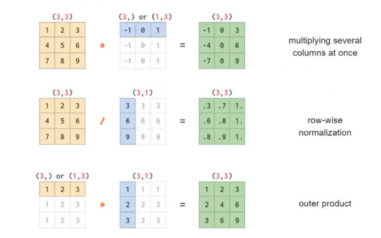

In [39]:
%cd

/root


[]('./broadcasting.png')

In [43]:
#np.linalg.

In [45]:
@njit
def heaviside(x):
  return 1 if x>0 else 0 #forma pythonica

In [46]:
heaviside_np = np.vectorize(heaviside)

In [47]:
x = np.linspace(-1000, 1000, 1000000)

In [50]:
x

array([-1000.   ,  -999.998,  -999.996, ...,   999.996,   999.998,
        1000.   ])

In [58]:
y=range(-1000, 1000, 1000000)


In [59]:
y

range(-1000, 1000, 1000000)

In [62]:
%%timeit

heaviside_np(x)

1 loop, best of 5: 202 ms per loop


In [66]:
%%timeit

for num in x:
  heaviside(num)

1 loop, best of 5: 359 ms per loop


In [67]:
@njit
def heaviside_jit(x):
  for num in x:
    heaviside(num)

In [68]:
%%timeit

heaviside_jit(x)

The slowest run took 215709.59 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 298 ns per loop


In [69]:
%%timeit #célula inteira

np.where( x > 0, 1, 0) #loop com if

100 loops, best of 5: 2.18 ms per loop


In [72]:
%timeit np.where( x > 0, 1, 0) #%só essa linha

100 loops, best of 5: 2.24 ms per loop


In [73]:
x > 0

array([False, False, False, ...,  True,  True,  True])

In [74]:
!pip install gplearn

     |████████████████████████████████| 41 kB 246 kB/s 


In [75]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.140
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.28
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

## Fractal de Mandelbrot


*   estruturas geométricas que se repetem.




In [76]:
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
            1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

In [89]:
size = 400
iterations = 100

m = mandelbrot_python(size, iterations)

In [90]:
import plotly.express as px

In [91]:
px.imshow(np.log(m))

In [92]:
%timeit mandelbrot_python(size, iterations)

1 loop, best of 5: 7.58 s per loop


In [81]:
x, y = np.meshgrid(np.linspace(-2,2, 5), np.linspace(-2,2, 5))

In [82]:
x

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [83]:
y

array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]])

In [84]:
x [2:4, :] = 0

In [85]:
x

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-2., -1.,  0.,  1.,  2.]])

In [86]:
def initialize(size):
    x, y = np.meshgrid(np.linspace(-2, 1, size),
    np.linspace(-1.5, 1.5, size))
    c = x + 1j * y
    z = c.copy()
    m = np.zeros((size, size))
    return c, z, m

In [87]:
def mandelbrot_numpy(c, z, m, iterations):
    for n in range(iterations):
        indices = np.abs(z) <= 10
        z[indices] = z[indices] ** 2 + c[indices]
        m[indices] = n

In [88]:
%%timeit 
c,z, m = initialize(size)

mandelbrot_numpy(c, z, m, iterations)

1 loop, best of 5: 312 ms per loop


## NumExpr

In [93]:
import numexpr as ne

In [94]:
x, y, z = np.random.randn(3, 10000000)

In [95]:
%timeit x + (y**2 + (z*x + 1)*3)

10 loops, best of 5: 79.1 ms per loop


In [96]:
%timeit ne.evaluate('x + (y**2 + (z*x + 1)*3)') #otimizado

10 loops, best of 5: 23.5 ms per loop


# Game of Life


As regras são simples e elegantes:

- Qualquer célula viva com menos de dois vizinhos vivos morre de solidão.
- Qualquer célula viva com mais de três vizinhos vivos morre de superpopulação.
- Qualquer célula morta com exatamente três vizinhos vivos se torna uma célula viva.
- Qualquer célula viva com dois ou três vizinhos vivos continua no mesmo estado para a próxima geração.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
N = 100

grid = np.random.randint(2, size=(N, N), dtype=np.uint8)

In [ ]:
plt.imshow(grid, cmap='gray', interpolation='nearest')

In [ ]:
l = [1,2,3,4,6]

In [ ]:
l[1:3]

- 0 -> False
- qualquer -> True

In [ ]:
newGrid = np.zeros(grid.shape)
row, col = grid.shape
for i in range(1, row-1):
  for j in range(1, col-1):
    state = grid[i,j]
    vizinhos = grid[i-1 : i+2,  j-1:j+2]
    k = np.sum(vizinhos) - state
    if state:
      if k ==2 or k==3:
        newGrid[i,j] = 1
      
    else:
      if k ==3:
        newGrid[i,j] = 1





In [ ]:
plt.imshow(newGrid, cmap='gray_r', interpolation='nearest')

In [ ]:
N = 100

grid = np.random.randint(2, size=(N, N), dtype=np.uint8)

plt.imshow(grid, cmap='gray_r', interpolation='nearest')

In [ ]:
#N = 100

#grid = np.random.randint(2, size=(N, N), dtype=np.uint8)

for _ in range(100):
  newGrid = np.zeros(grid.shape)
  row, col = grid.shape
  for i in range(1, row-1):
    for j in range(1, col-1):
      state = grid[i,j]
      vizinhos = grid[i-1 : i+2,  j-1:j+2]
      k = np.sum(vizinhos) - state
      if state:
        if k ==2 or k==3:
          newGrid[i,j] = 1
        
      else:
        if k ==3:
          newGrid[i,j] = 1

  grid[:] = newGrid[:]

In [ ]:
plt.imshow(grid, cmap='gray_r', interpolation='nearest')

In [ ]:
plt.imshow(grid, cmap='gray_r', interpolation='nearest')

In [ ]:
px.imshow(grid)

In [ ]:
px.imshow(grid)

In [ ]:
def update(frameNum, img, grid):
  newGrid = np.zeros_like(grid)
  row, col = grid.shape
  for i in range(1, row-1):
    for j in range(1, col-1):
      state = grid[i,j]
      vizinhos = grid[i-1 : i+2,  j-1:j+2]
      k = np.sum(vizinhos) - state
      if state:
        if k ==2 or k==3:
          newGrid[i,j] = 1
        
      else:
        if k ==3:
          newGrid[i,j] = 1

  img.set_data(newGrid)
  grid[:] = newGrid[:]

  return img

In [ ]:
import matplotlib.animation as animation

In [ ]:
def main():
  N = 100
  updateInterval = 50
  grid = np.random.randint(2, size=(N, N), dtype=np.uint8)
  fig, ax = plt.subplots()
  img = ax.imshow(grid, cmap='gray_r', interpolation='nearest')
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid),
                                frames=300,
                                interval=updateInterval,
                                save_count=50)
  ani.save('movie.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
  plt.show()

In [ ]:
main()

In [ ]:
from IPython.core.display import Video
#from IPython.display import Video

In [ ]:
Video('movie.mp4', embed=True)